# Exercise - OLS violations


### Erich Ferreira, Caue Ribeiro, Daniel Oliveira e Elisane Baecsktroem


**(1)** Test for violations of the first OLS assumption: $E[u_t]=0$

**(2)** Apply the possible solutions to violtations of the first OLS assumtions:
> **(a)** Use constant coefficient in the linear regression

**(3)** Test for violations of the homoskedasticity assumption $E[u^2_t]=\sigma^2$:
> **(a)** Goldfeld-Quandt (1965) test

> **(b)** White (1980) test, which has two implementations
>> **(i)** Lagrange multiplier test

**(4)** Apply the possible solutions to heteroskedasticity:
> **(a)** Transform the variables into logs

> **(b)** Apply the White (1980) heteroskedasticity correction for the standard errors

**(5)** Test for violations of the third OLS assumption: $cov(u_t, u_{t-1})=0$

In [13]:
rm(list=ls())
library(dplyr)
library(here)
library(readxl)
library(car)
library(lmtest)
library(dplyr)
library(plm)
library(Hmisc)

Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units



In [19]:
df = read_excel(here('src', 'data', 'fred.xls'))

In [20]:
dim(df)

[1] 437   7

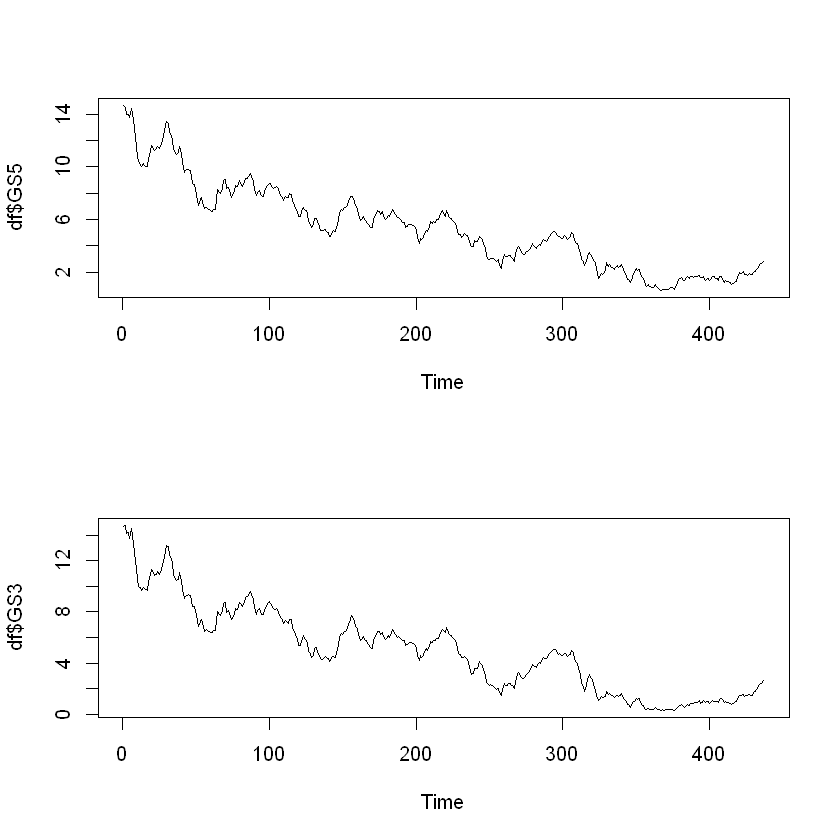

In [21]:
par(mfrow=c(2, 1))
ts.plot(df$GS5)
ts.plot(df$GS3)

In [22]:
df = df %>% mutate(GS5=100*(log(GS5)-Lag(log(GS5), 1)), GS3=100*(log(GS3)-Lag(log(GS3), 1)))
head(df)

Date,GS3,GS1,GS10,GS5,GS3M,GS6M
1982-01-01,NA,14.32,14.59,NA,12.92,13.90
1982-02-01,0.6128667,14.73,14.43,-0.7536840,14.28,14.81
1982-03-01,-4.1585995,13.95,13.86,-3.9275765,13.31,13.83
1982-04-01,0.3532338,13.98,13.87,0.1429626,13.34,13.87
1982-05-01,-2.9340197,13.34,13.62,-1.8018506,12.71,13.13
1982-06-01,5.0276009,14.07,14.30,4.8270570,13.08,13.76


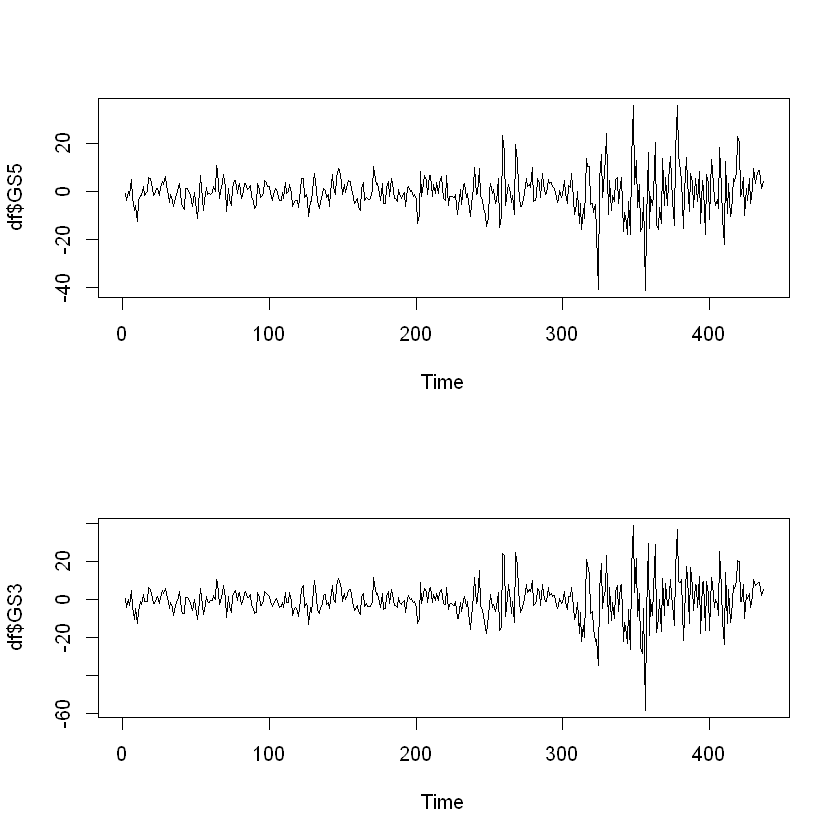

In [23]:
par(mfrow=c(2, 1))
ts.plot(df$GS5)
ts.plot(df$GS3)

**(1)** Test for violations of the first OLS assumption: $E[u_t]=0$

To test for violations of the first OLS assumtion, we estimate the linear model without including an intercept.

### Model 1a: GS3 ~ intercept + GS5

In [29]:
model1 = lm(GS3 ~ GS5, df)
summary(model1)


Call:
lm(formula = GS3 ~ GS5, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.9574  -0.9263   0.0450   0.8492  12.9200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04602    0.12474   0.369    0.712    
GS5          1.15682    0.01597  72.458   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.602 on 434 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9236,	Adjusted R-squared:  0.9235 
F-statistic:  5250 on 1 and 434 DF,  p-value: < 2.2e-16


### Model 1b: GS3 ~ GS5

In [31]:
model1_without_intercept = lm(GS3 ~ GS5 -1, df)
summary(model1_without_intercept)


Call:
lm(formula = GS3 ~ GS5 - 1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.9129  -0.8797   0.0902   0.8940  12.9543 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
GS5  1.15653    0.01593    72.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.599 on 435 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9238,	Adjusted R-squared:  0.9236 
F-statistic:  5270 on 1 and 435 DF,  p-value: < 2.2e-16


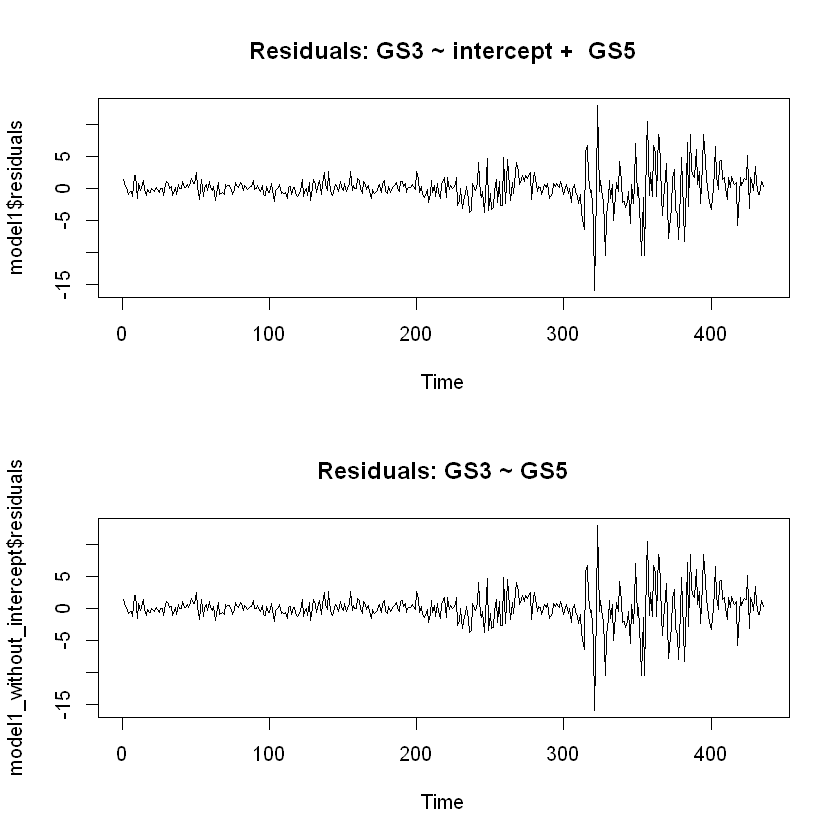

In [32]:
par(mfrow=c(2,1))
ts.plot(model1$residuals)
title('Residuals: GS3 ~ intercept +  GS5')
ts.plot(model1_without_intercept$residuals)
title('Residuals: GS3 ~ GS5')

In [33]:
print(paste0('Mean of the residuals of the first model: ', mean(model1$residuals), 'Mean of the residuals of the second model: ', mean(model1_without_intercept$residuals)))

[1] "Mean of the residuals of the first model: -4.64387289811619e-17Mean of the residuals of the second model: 0.0459145951590789"


The analysis of the residuals of the model wiht/without intercept (ts plot and mean) appears to indicate that the first hypothesis is not violated.

Since we do not have any good reason to exclude the intercept, we choose to include it.

**(2)** Apply the possible solutions to violtations of the first OLS assumtions:
> **(a)** Use constant coefficient in the linear regression

### Model 1: GS3 ~ intercept + GS5

In [35]:
model1 = lm(GS3 ~ GS5, df)
summary(model1)


Call:
lm(formula = GS3 ~ GS5, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.9574  -0.9263   0.0450   0.8492  12.9200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04602    0.12474   0.369    0.712    
GS5          1.15682    0.01597  72.458   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.602 on 434 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9236,	Adjusted R-squared:  0.9235 
F-statistic:  5250 on 1 and 434 DF,  p-value: < 2.2e-16


**(3)** Test for violations of the homoskedasticity assumption $E[u^2_t]=\sigma^2$:
> **(a)** Goldfeld-Quandt (1965) test

Assume that we have a sample o f size T, which in our case is T=4868. The Goldfeld-Quandt test consists in splitting the sample into two parts, T1 and T2. The linear regression model is estimated in each of the samples, and the residual variances are calulated. 

The hypothesis of the test is as follows:

$
H_0: \sigma^2_1 = \sigma^2_2 \\
H_1: \sigma^2_1 \neq \sigma^2_2
$

The test statistics, denoted GQ, is given by:

$
GQ = \frac{max(s^2_1, s^2_2)}{min(s^2_1, s^2_2)} \sim F(T_1-k, T_2-k)
$

Where:

$
s^2_1 = \frac{\hat{u}^{'}_1\hat{u}_1}{T_1-k} \quad s^2_2 = \frac{\hat{u}^{'}_2\hat{u}_2}{T_2-k} 
$


### Model 1: GS3 ~ intercept + GS5

In [36]:
gqtest(df$GS3 ~ df$GS5, alternative = 'two.sided')


	Goldfeld-Quandt test

data:  df$GS3 ~ df$GS5
GQ = 19.819, df1 = 216, df2 = 216, p-value < 2.2e-16
alternative hypothesis: variance changes from segment 1 to 2


Note that the test statistics provide us strong evidence that we can reject the null with a low probability of type I error. Therefore, we can strongly reject the null hypothesis of homoskedasticity.

> **(b)** White (1980) test, which has two implementations

The white test consists of a two-step procedure. First estimate a linear regression model (assuming two independent variables):

$
y_t = \beta_1 + \beta_2 x_{2,t} + \beta_3 x_{3,t} + u_t
$

Second, run the auxiliary regression model given by:

$
\hat{u}^2_t = \alpha_1 + \alpha_2 x_{2,t} + \alpha_3 x_{3,t} + \alpha_4 x^2_{2,t} + \alpha_5 x^2_{3,t} + \alpha_6 x_{2,t}x_{3,t} + v_t
$

Given the auxiliary regression, the test can be conducted using two different approaches:

> **(i)** Lagrange multiplier test

The Lagrange multiplier test is an easy implementation of the White test which consists of the following hypothesis:

$
H_0: \sigma^2_t = \sigma^2 \\
H_1: \sigma^2_t = \mathcal{f}(\mathbf{x}, \mathbf{z}; \delta) 
$

where $\mathbf{x}$ is a vector of independent variables, $\mathbf{z}$ is a vector of the interations between independent variables, and $\delta$ is a vector of coefficients including the interation coefficients.

The test statistics, denoted W, is given by:

$
W = T*R^2 \sim \chi^2(m)
$

where T is the sample size, and $R^2$ is the coefficient of determination. The statistics $W$ follows a qui-squared distribution with $m$ degress f freedom, where $m$ is the number of regressors in the auxiliary model.

### Auxiliary model 1

In [37]:
df_white1 = data.frame(cbind(model1$residuals^2, df$GS3, df$GS3^2, df$GS5, df$GS5^2))
colnames(df_white1) = c('resid', 'GS3', 'GS3_2', 'GS5', 'GS5_2')
white_model_1 = lm(resid ~ GS3 + GS3_2 + GS5 + GS5_2, data = df_white1) 
summary(white_model_1)

Warning message in cbind(model1$residuals^2, df$GS3, df$GS3^2, df$GS5, df$GS5^2):
"number of rows of result is not a multiple of vector length (arg 1)"


Call:
lm(formula = resid ~ GS3 + GS3_2 + GS5 + GS5_2, data = df_white1)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.039  -5.555  -4.317  -2.372 240.241 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.0937478  1.0414946   4.891 1.42e-06 ***
GS3         -0.5038243  0.3826392  -1.317   0.1886    
GS3_2        0.0177415  0.0097920   1.812   0.0707 .  
GS5          0.2775924  0.4569330   0.608   0.5438    
GS5_2       -0.0002715  0.0139751  -0.019   0.9845    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20.25 on 431 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.06396,	Adjusted R-squared:  0.05527 
F-statistic: 7.362 on 4 and 431 DF,  p-value: 9.64e-06


We can note that for most o the variables the p-values are to high to reject the null hypothesis with confidence. Therefore, we do not reject the null hypothesis of homoskedasticity, in contrast with the GC test.


Depite the different results about the rejection of the homoskedasticity, the inspection of the ts plot of the residuals, together with the GC test results, seems to indicate that the variance of the residuals had increased after observation 300.


**(4)** Apply the possible solutions to heteroskedasticity:
> **(a)** Transform the variables into logs

If the cause of the heteroskedasticity is known (i.e. induced by a constant in the variance of the error), the easiest way to fix it is to make a trnsformation of the original linear model (i.e. dividing or multiplying by a constant, and/or taking the log).

In our case in particular the variables are already in log, therefore theres no reason to apply this procedure. Furthermore, the White test does not reject the null of homeskedasticity, which is an evidence that the log difference procedure may have been at least partically effective.

> **(b)** Apply the White (1980) heteroskedasticity correction for the standard errors

[coeftest](https://www.rdocumentation.org/packages/lmtest/versions/0.9-38/topics/coeftest)

[vcovH](https://www.rdocumentation.org/packages/plm/versions/1.6-5/topics/vcovHC)

### SE corrected model 1 

In [41]:
coeftest(model1, vcov =  vcovHC(model1, type = "HC0"))


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.046022   0.122904  0.3745   0.7082    
GS5         1.156815   0.033860 34.1646   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


The White standard error correction does not affect our conclusion about the significance of the "GS5" independent variable. Since the White test for homoskedasticity did not rejected the null hypothesis, the result of the White correction comes with no surprise to us.

**(5)** Test for violations of the third OLS assumption: $cov(u_t, u_{t-1})=0$

One easy and effective way to test for violations of this hypothesis is to analyse the scatter plot of the fitted residuals against its lagged value, and the time series plot of the fitted residuals.

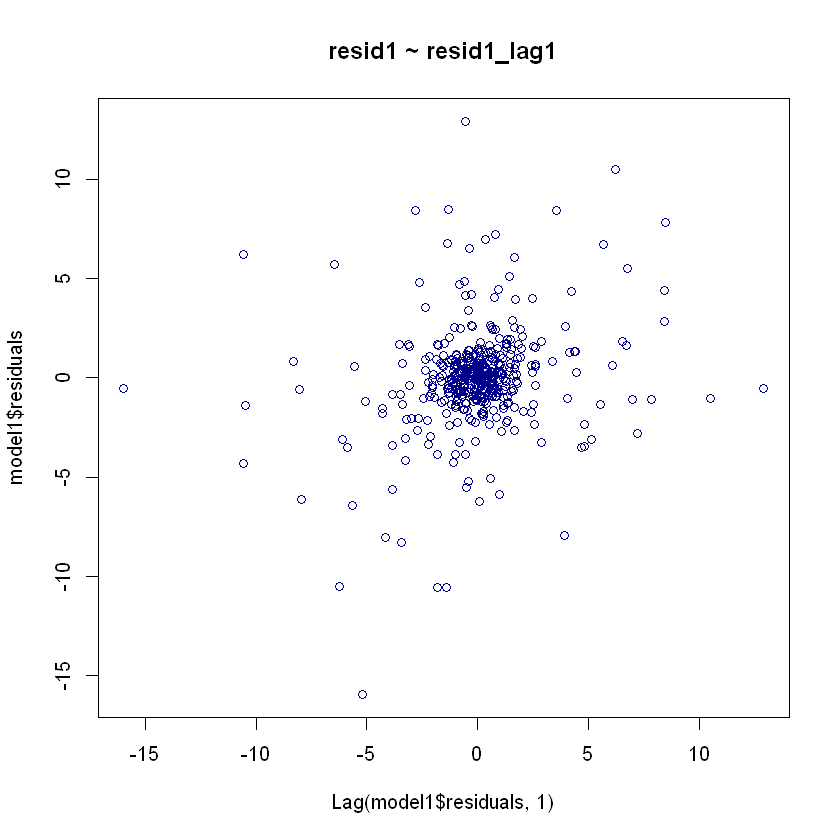

In [42]:
plot.default(Lag(model1$residuals, 1), model1$residuals, col='darkblue')
title('resid1 ~ resid1_lag1')

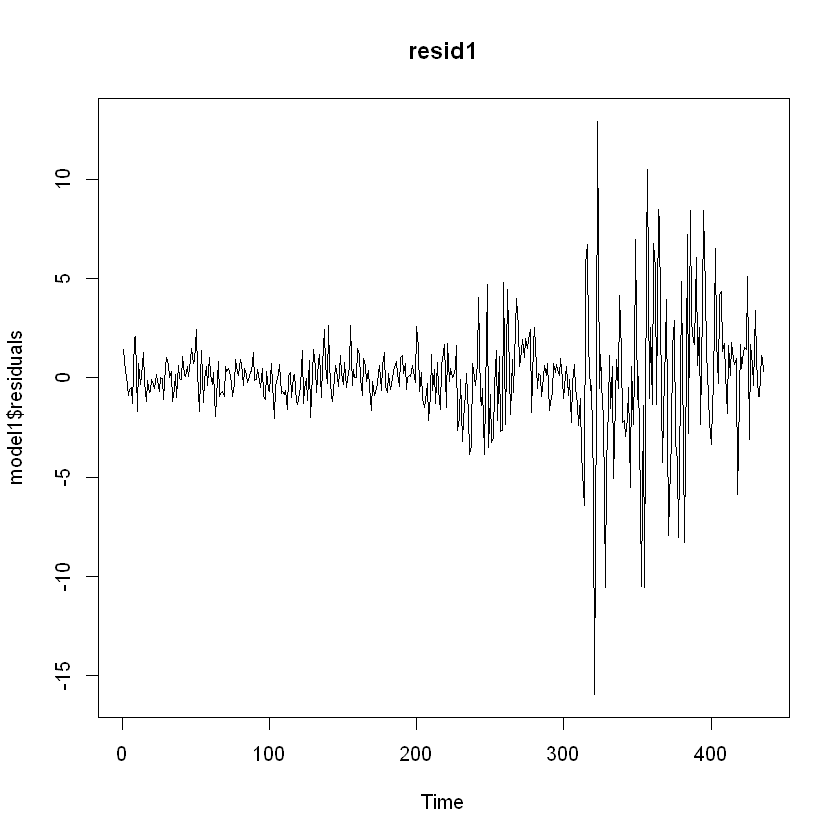

In [43]:
ts.plot(model1$residuals)
title('resid1')

Both the scatter plot and ts plot for both of the models show a sligthly positive relationship between the residuals and its lag. This means that it is possible that third OLS hypothesis my have beem violated, but further tests need to be done.